## 3. Methodology

Here will be analyzing our data and performing some data wranggling to help us derive the average safety-index score for each Neighborhood from 2014 to 2019

###  3.1 Loading and preparing Data

In [1]:
# The code was removed by Watson Studio for sharing.

,Index_,premisetype,offence,occurrenceyear,MCI,Hood_ID,Neighbourhood,Long,Lat
0,1601,Outside,Robbery - Delivery Person,2014.0,Robbery,3,Thistletown-Beaumond Heights (3),-79.561577,43.738834
1,1602,House,B&E,2014.0,Break and Enter,119,Wexford/Maryvale (119),-79.305710,43.752358
2,1603,Outside,Assault,2014.0,Assault,95,Annex (95),-79.397377,43.668034
3,1604,Commercial,B&E,2014.0,Break and Enter,137,Woburn (137),-79.231758,43.776440
4,1605,Commercial,Robbery - Business,2014.0,Robbery,138,Eglinton East (138),-79.238357,43.738857


In [2]:
#We have loaded our data, let's drop the rows that we don't need i.e. index_, offence (same as MCI), and premisetype for now

df_Tneigh.drop(['Index_','premisetype','offence'], axis = 1, inplace = True)
df_Tneigh.head()

,occurrenceyear,MCI,Hood_ID,Neighbourhood,Long,Lat
0,2014.0,Robbery,3,Thistletown-Beaumond Heights (3),-79.561577,43.738834
1,2014.0,Break and Enter,119,Wexford/Maryvale (119),-79.305710,43.752358
2,2014.0,Assault,95,Annex (95),-79.397377,43.668034
3,2014.0,Break and Enter,137,Woburn (137),-79.231758,43.776440
4,2014.0,Robbery,138,Eglinton East (138),-79.238357,43.738857


In [3]:
#Let's see how large our dataset is
df_Tneigh.shape

(206435, 6)

In [4]:
# Checking for row with null values
df_Tneigh.isnull().sum()

occurrenceyear    59
MCI                0
Hood_ID            0
Neighbourhood      0
Long               0
Lat                0
dtype: int64

In [5]:
# There are 59 rows without value for occurenceyear, let's drop them
df_Tneigh = df_Tneigh.dropna()
df_Tneigh.shape

(206376, 6)

In [6]:
#Checking to see that the rows where deleted
df_Tneigh.isnull().sum()

occurrenceyear    0
MCI               0
Hood_ID           0
Neighbourhood     0
Long              0
Lat               0
dtype: int64

In [7]:
# Checking data types
df_Tneigh.dtypes

occurrenceyear    float64
MCI                object
Hood_ID             int64
Neighbourhood      object
Long              float64
Lat               float64
dtype: object

In [8]:
#let's convert the occurrence year from float to int
df_Tneigh['CrimeYear'] = df_Tneigh['occurrenceyear'].astype(int, inplace = True)
df_Tneigh.drop(['occurrenceyear'], axis = 1, inplace = True)
df_Tneigh.head()

,MCI,Hood_ID,Neighbourhood,Long,Lat,CrimeYear
0,Robbery,3,Thistletown-Beaumond Heights (3),-79.561577,43.738834,2014
1,Break and Enter,119,Wexford/Maryvale (119),-79.305710,43.752358,2014
2,Assault,95,Annex (95),-79.397377,43.668034,2014
3,Break and Enter,137,Woburn (137),-79.231758,43.776440,2014
4,Robbery,138,Eglinton East (138),-79.238357,43.738857,2014


In [9]:
#let's correct the Neighborhood column by removing the numbers
df_Tneigh[['N1', 'N2']] = df_Tneigh.Neighbourhood.str.split("(", 1, expand = True)
df_Tneigh.drop(['N2','Neighbourhood'], axis = 1, inplace = True)
df_Tneigh.head()

,MCI,Hood_ID,Long,Lat,CrimeYear,N1
0,Robbery,3,-79.561577,43.738834,2014,Thistletown-Beaumond Heights
1,Break and Enter,119,-79.305710,43.752358,2014,Wexford/Maryvale
2,Assault,95,-79.397377,43.668034,2014,Annex
3,Break and Enter,137,-79.231758,43.776440,2014,Woburn
4,Robbery,138,-79.238357,43.738857,2014,Eglinton East


In [10]:
df_Tneigh.rename(columns = {"N1":"Neighbourhood"}, inplace = True)
df_Tneigh.head()

,MCI,Hood_ID,Long,Lat,CrimeYear,Neighbourhood
0,Robbery,3,-79.561577,43.738834,2014,Thistletown-Beaumond Heights
1,Break and Enter,119,-79.305710,43.752358,2014,Wexford/Maryvale
2,Assault,95,-79.397377,43.668034,2014,Annex
3,Break and Enter,137,-79.231758,43.776440,2014,Woburn
4,Robbery,138,-79.238357,43.738857,2014,Eglinton East


### 3.2 Data Wrangling and Analysis

### Let proceed further to get the safety-index score for each year from 2014 - 2019

In [11]:
# Before we proceed, let's get the latitude and longitude of each Neighborhood because we will need it later
df_lat_long = df_Tneigh.copy()
df_lat_long.drop(['MCI','Hood_ID','CrimeYear'], axis = 1, inplace = True)
df_lat_long.sort_values('Neighbourhood', inplace = True)
df_lat_long.drop_duplicates(subset = 'Neighbourhood', keep = 'first', inplace = True)
df_lat_long.reset_index(inplace =True)
df_lat_long.drop(['index'], axis = 1, inplace = True)
print(df_lat_long.shape)
df_lat_long.head()

(140, 3)


,Long,Lat,Neighbourhood
0,-79.284340,43.811016,Agincourt North
1,-79.282066,43.779476,Agincourt South-Malvern West
2,-79.531876,43.600124,Alderwood
3,-79.390526,43.672138,Annex
4,-79.340981,43.737698,Banbury-Don Mills


#### Year 2014

In [12]:
# Year 2014
df_2014 = df_Tneigh.loc[df_Tneigh[:]['CrimeYear']==2014]  # Filtering our data to get 2014 offences
df_2014_SI = df_2014.groupby(['Neighbourhood']).size().reset_index(name = 'OC_14') # Grouping by Neighborhoods to get the offence counts (OC_14) in each neighborhood
print(df_2014.shape)
df_2014_SI.head()

(31638, 6)


,Neighbourhood,OC_14
0,Agincourt North,175
1,Agincourt South-Malvern West,258
2,Alderwood,92
3,Annex,434
4,Banbury-Don Mills,169


In [13]:
# Safety-Index(SI_14) = (OC_14)/TC_14  where TC_14 is the total count of crimes for the year 2014
# Let's add it to our dataframe
TC_14 = 31638      # This value can easily be obtained thus: TC_14 = df_2014.shape[0] 
df_2014_SI['SI_14'] = (df_2014_SI['OC_14']/TC_14)
print(df_2014_SI.shape)
df_2014_SI.head()

(140, 3)


,Neighbourhood,OC_14,SI_14
0,Agincourt North,175,0.005531
1,Agincourt South-Malvern West,258,0.008155
2,Alderwood,92,0.002908
3,Annex,434,0.013718
4,Banbury-Don Mills,169,0.005342


#### Let us repeat the same thing for years 2015, 2016, 2017,2018 and 2019 while slightly modifying our variables

In [14]:
#Year 2015

df_2015 = df_Tneigh.loc[df_Tneigh[:]['CrimeYear']==2015] # Filtering our data to get 2015 offences
df_2015_SI = df_2015.groupby(['Neighbourhood']).size().reset_index(name = 'OC_15') # Grouping by Neighborhoods to get the offence counts (OC_15) in each neighborhood
print(df_2015.shape)
# Safety-Index(SI_15) = (OC_15)/TC_15 where TC_15 is the total count of crimes for the year 2015
# Let's add it to our dataframe

TC_15 = df_2015.shape[0]
df_2015_SI['SI_15'] = (df_2015_SI['OC_15']/TC_15)
print(df_2015_SI.shape)
df_2015_SI.head(3)

(32316, 6)
(140, 3)


,Neighbourhood,OC_15,SI_15
0,Agincourt North,188,0.005818
1,Agincourt South-Malvern West,229,0.007086
2,Alderwood,99,0.003063


In [15]:
#Year 2016

df_2016 = df_Tneigh.loc[df_Tneigh[:]['CrimeYear']==2016] # Filtering our data to get 2016 offences
df_2016_SI = df_2016.groupby(['Neighbourhood']).size().reset_index(name = 'OC_16') # Grouping by Neighborhoods to get the offence counts (OC_16) in each neighborhood
print(df_2016.shape)
# Safety-Index(SI_16) = (OC_16)/TC_16 where TC_16 is the total count of crimes for the year 2016
# Let's add it to our dataframe

TC_16 = df_2016.shape[0]
df_2016_SI['SI_16'] = (df_2016_SI['OC_16']/TC_16)
print(df_2016_SI.shape)
df_2016_SI.head(3)

(32809, 6)
(140, 3)


,Neighbourhood,OC_16,SI_16
0,Agincourt North,160,0.004877
1,Agincourt South-Malvern West,264,0.008047
2,Alderwood,103,0.003139


In [16]:
#Year 2017

df_2017 = df_Tneigh.loc[df_Tneigh[:]['CrimeYear']==2017] # Filtering our data to get 2017 offences
df_2017_SI = df_2017.groupby(['Neighbourhood']).size().reset_index(name = 'OC_17') # Grouping by Neighborhoods to get the offence counts (OC_17) in each neighborhood
print(df_2017.shape)
# Safety-Index(SI_17) = (OC_17)/TC_17 where TC_17 is the total count of crimes for the year 2017
# Let's add it to our dataframe

TC_17 = df_2017.shape[0]
df_2017_SI['SI_17'] = (df_2017_SI['OC_17']/TC_17)
print(df_2017_SI.shape)
df_2017_SI.head(3)

(34561, 6)
(140, 3)


,Neighbourhood,OC_17,SI_17
0,Agincourt North,184,0.005324
1,Agincourt South-Malvern West,290,0.008391
2,Alderwood,73,0.002112


In [17]:
#Year 2018

df_2018 = df_Tneigh.loc[df_Tneigh[:]['CrimeYear']==2018] # Filtering our data to get 2018 offences
df_2018_SI = df_2018.groupby(['Neighbourhood']).size().reset_index(name = 'OC_18') # Grouping by Neighborhoods to get the offence counts (OC_18) in each neighborhood
print(df_2018.shape)
# Safety-Index(SI_18) = (OC_18)/TC_18 where TC_18 is the total count of crimes for the year 2018
# Let's add it to our dataframe

TC_18 = df_2018.shape[0]
df_2018_SI['SI_18'] = (df_2018_SI['OC_18']/TC_18)
print(df_2018_SI.shape)
df_2018_SI.head(3)

(36323, 6)
(140, 3)


,Neighbourhood,OC_18,SI_18
0,Agincourt North,237,0.006525
1,Agincourt South-Malvern West,282,0.007764
2,Alderwood,91,0.002505


In [18]:
#Year 2019

df_2019 = df_Tneigh.loc[df_Tneigh[:]['CrimeYear']==2019] # Filtering our data to get 2019 offences
df_2019_SI = df_2019.groupby(['Neighbourhood']).size().reset_index(name = 'OC_19') # Grouping by Neighborhoods to get the offence counts (OC_19) in each neighborhood
print(df_2019.shape)
# Safety-Index(SI_19) = (OC_19)/TC_19 where TC_19 is the total count of crimes for the year 2019
# Let's add it to our dataframe

TC_19 = df_2019.shape[0]
df_2019_SI['SI_19'] = (df_2019_SI['OC_19']/TC_19)
print(df_2019_SI.shape)
df_2019_SI.head(3)

(37674, 6)
(140, 3)


,Neighbourhood,OC_19,SI_19
0,Agincourt North,210,0.005574
1,Agincourt South-Malvern West,309,0.008202
2,Alderwood,85,0.002256


### 3.3 Reconstructing our Dataframe

In [19]:
import functools

dfs = [df_2014_SI, df_2015_SI, df_2016_SI, df_2017_SI, df_2018_SI, df_2019_SI]

df_Neigh = functools.reduce(lambda left,right: pd.merge(left,right,on='Neighbourhood'), dfs)
df_Neigh.head(10)

,Neighbourhood,OC_14,SI_14,OC_15,SI_15,OC_16,SI_16,OC_17,SI_17,OC_18,SI_18,OC_19,SI_19
0,Agincourt North,175,0.005531,188,0.005818,160,0.004877,184,0.005324,237,0.006525,210,0.005574
1,Agincourt South-Malvern West,258,0.008155,229,0.007086,264,0.008047,290,0.008391,282,0.007764,309,0.008202
2,Alderwood,92,0.002908,99,0.003063,103,0.003139,73,0.002112,91,0.002505,85,0.002256
3,Annex,434,0.013718,406,0.012563,454,0.013838,477,0.013802,538,0.014812,598,0.015873
4,Banbury-Don Mills,169,0.005342,227,0.007024,179,0.005456,204,0.005903,205,0.005644,214,0.005680
5,Bathurst Manor,123,0.003888,100,0.003094,138,0.004206,120,0.003472,134,0.003689,112,0.002973
6,Bay Street Corridor,878,0.027751,1048,0.032430,1045,0.031851,1247,0.036081,1232,0.033918,1350,0.035834
7,Bayview Village,166,0.005247,164,0.005075,152,0.004633,141,0.004080,135,0.003717,161,0.004274
8,Bayview Woods-Steeles,83,0.002623,85,0.002630,88,0.002682,102,0.002951,91,0.002505,89,0.002362
9,Bedford Park-Nortown,194,0.006132,149,0.004611,192,0.005852,245,0.007089,210,0.005781,246,0.006530


In [20]:
#let's get the average safety-index (A_SI) and the average offence-count (A_OC) for each Neighborhood 
df_Neigh['A_OC'] = round(((df_Neigh['OC_14'] + df_Neigh['OC_15'] + df_Neigh['OC_16'] + df_Neigh['OC_17'] + df_Neigh['OC_18'] + df_Neigh['OC_19'])/6),0)
df_Neigh['A_SI'] = (df_Neigh['SI_14'] + df_Neigh['SI_15'] + df_Neigh['SI_16'] + df_Neigh['SI_17'] + df_Neigh['SI_18'] + df_Neigh['SI_19'])/6
df_Neigh.head(5)

,Neighbourhood,OC_14,SI_14,OC_15,SI_15,OC_16,SI_16,OC_17,SI_17,OC_18,SI_18,OC_19,SI_19,A_OC,A_SI
0,Agincourt North,175,0.005531,188,0.005818,160,0.004877,184,0.005324,237,0.006525,210,0.005574,192.0,0.005608
1,Agincourt South-Malvern West,258,0.008155,229,0.007086,264,0.008047,290,0.008391,282,0.007764,309,0.008202,272.0,0.007941
2,Alderwood,92,0.002908,99,0.003063,103,0.003139,73,0.002112,91,0.002505,85,0.002256,90.0,0.002664
3,Annex,434,0.013718,406,0.012563,454,0.013838,477,0.013802,538,0.014812,598,0.015873,484.0,0.014101
4,Banbury-Don Mills,169,0.005342,227,0.007024,179,0.005456,204,0.005903,205,0.005644,214,0.005680,200.0,0.005841


In [21]:
# Let's see if we can scale our data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [22]:
df_Neigh[['SI_14', 'SI_15', 'SI_16', 'SI_17', 'SI_18', 'SI_19', 'A_SI']] = scaler.fit_transform(df_Neigh[['SI_14', 'SI_15', 'SI_16', 'SI_17', 'SI_18', 'SI_19','A_SI']])
df_Neigh.head(5)

,Neighbourhood,OC_14,SI_14,OC_15,SI_15,OC_16,SI_16,OC_17,SI_17,OC_18,SI_18,OC_19,SI_19,A_OC,A_SI
0,Agincourt North,175,0.122024,188,0.124552,160,0.094572,184,0.101504,237,0.126860,210,0.122132,192.0,0.108882
1,Agincourt South-Malvern West,258,0.204365,229,0.161290,264,0.180099,290,0.181203,282,0.158753,309,0.195411,272.0,0.174136
2,Alderwood,92,0.039683,99,0.044803,103,0.047697,73,0.018045,91,0.023388,85,0.029608,90.0,0.026526
3,Annex,434,0.378968,406,0.319892,454,0.336349,477,0.321805,538,0.340184,598,0.409326,484.0,0.346463
4,Banbury-Don Mills,169,0.116071,227,0.159498,179,0.110197,204,0.116541,205,0.104181,214,0.125093,200.0,0.115411


In [23]:
# Let's select the columns that we need
df_Neigh_SI = df_Neigh[['Neighbourhood', 'A_OC', 'A_SI']]

# Next let's combine it with the dataframe containing our latitude and longitude i.e. df_lat_long 
dfs1 = [df_Neigh_SI,df_lat_long]

df_Neigh_SI = functools.reduce(lambda left,right: pd.merge(left,right,on='Neighbourhood'), dfs1)
print(df_Neigh_SI.shape)
df_Neigh_SI.head()

(140, 5)


,Neighbourhood,A_OC,A_SI,Long,Lat
0,Agincourt North,192.0,0.108882,-79.284340,43.811016
1,Agincourt South-Malvern West,272.0,0.174136,-79.282066,43.779476
2,Alderwood,90.0,0.026526,-79.531876,43.600124
3,Annex,484.0,0.346463,-79.390526,43.672138
4,Banbury-Don Mills,200.0,0.115411,-79.340981,43.737698


In [24]:
# Importing dependencies to create plots
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

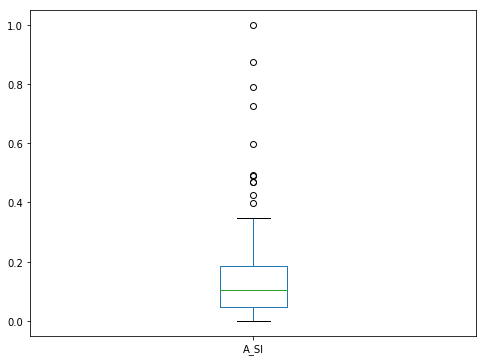

In [25]:
# Creating a Box plot to help us get an idea of how best to cluster our Neighborhoods
df_Neigh_SI['A_SI'].plot(kind = 'Box', figsize = (8,6))
plt.show()

From the box plot above we can see that our median which is about 0.1, gives us a general idea of a score that can accurately describe a safe Neighbourhood, thus from the median value downwards, we can classify as Very_Safe, from the median up to the third quartile, we classify as Safe, and from the third quartile nearing the maximum point, we have Fairly_Safe neighbourhoods, and for our outliers we have Unsafe and Very_Unsafe neighborhoods.

### 3.4 Clustering our Neighborhoods

In [26]:
# Using the insights from the Box plot above, let's cluster our Neighbourhood with the average safety-index score
# Our safety-Index (SI) is from 0 to 1 interpreted as from very_safe(0) to very_unsafe(1)
# - So the higher the SI score, the more unsafe the Neighbourhood is
# - and the lower the SI score, the safer the Neighbourhood is

#Let's segment reconstucted dataset: 

df_Neigh_bs = df_Neigh_SI.loc[df_Neigh_SI[:]['A_SI']>=0.4]   # SI Greater than 0.4 => Very_Unsafe

df_Neigh_ps = df_Neigh_SI['A_SI'].between(0.3, 0.4, inclusive = True) # SI between 0.3 and 0.4 => Unsafe
df_Neigh_ps = df_Neigh_SI[df_Neigh_ps]

df_Neigh_fs = df_Neigh_SI['A_SI'].between(0.2, 0.3, inclusive = True) # SI between 0.2 and 0.3 => Fairly_Safe
df_Neigh_fs = df_Neigh_SI[df_Neigh_fs]

df_Neigh_gs = df_Neigh_SI['A_SI'].between(0.1, 0.2, inclusive = True) # SI between 0.1 and 0.2 => Safe
df_Neigh_gs = df_Neigh_SI[df_Neigh_gs]

df_Neigh_es = df_Neigh_SI.loc[df_Neigh_SI[:]['A_SI']<0.1] # SI less than 0.1 => Very_Safe

#Checking to ensure that there are no duplicates since the total neighborhoods should exceed 140
print(df_Neigh_es.shape)
print(df_Neigh_gs.shape)
print(df_Neigh_fs.shape)
print(df_Neigh_ps.shape)
print(df_Neigh_bs.shape)

(67, 5)
(40, 5)
(15, 5)
(8, 5)
(10, 5)


### Let's create bar charts for the first three clusters, i.e very unsafe, unsafe and fairly safe

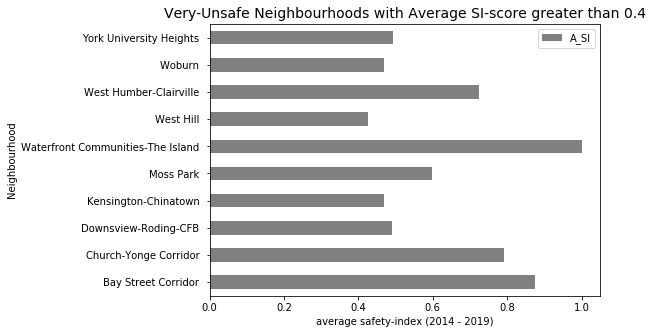

In [27]:
#Very Unsafe Neighbourhoods
ax = df_Neigh_bs.plot.barh(x='Neighbourhood', y= 'A_SI', rot=0,color = 'grey',figsize = (7,5))
plt.xlabel('average safety-index (2014 - 2019)')
plt.title('Very-Unsafe Neighbourhoods with Average SI-score greater than 0.4', fontsize = 14)
plt.show()

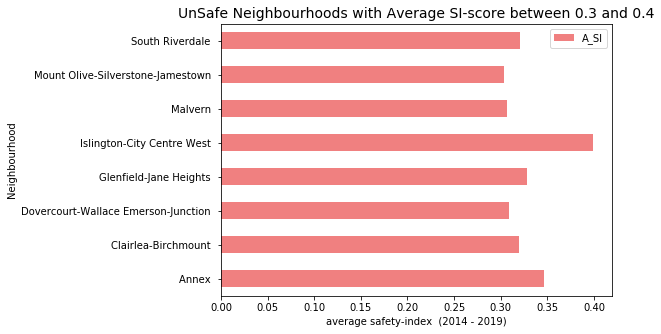

In [28]:
#Fairly Safe Neighborhoods
ax = df_Neigh_ps.plot.barh(x='Neighbourhood', y='A_SI', rot=0,color = '#F08080',figsize = (7,5))
plt.xlabel('average safety-index  (2014 - 2019)')
plt.title('UnSafe Neighbourhoods with Average SI-score between 0.3 and 0.4',fontsize = 14)
plt.show()

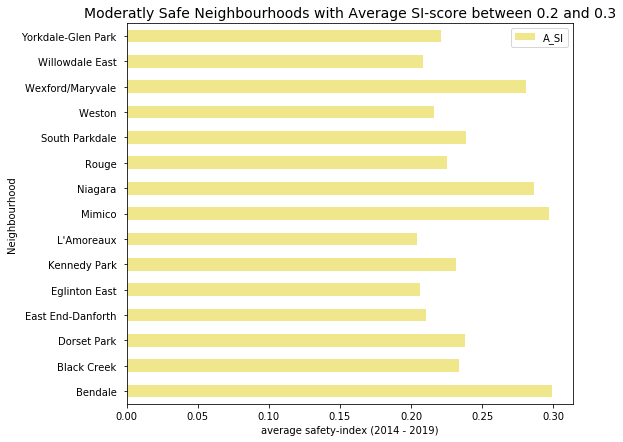

In [29]:
#Fairly Safe Neighborhoods
ax = df_Neigh_fs.plot.barh(x='Neighbourhood', y='A_SI', rot=0,color = '#F0E68C',figsize = (8,7))
plt.xlabel('average safety-index (2014 - 2019)')
plt.title('Moderatly Safe Neighbourhoods with Average SI-score between 0.2 and 0.3',fontsize = 14)
plt.show()

### 3.5 Summary
So far we have been able to load and prepare our data, we performed some data wrangling and analysis on our dataset, and finally we put it back together by reconstructing our dataset and placing our Neighbourhoods into clusters.
We will now proceed further to display our clusters on a map as we examine our results and see what insights can be deduced from all our analysis.

## 4. Results

### 4.1 From the above we were able to place our dataset into five clusters using the derived safety-index (SI) score
  1. <b>Cluster1: (Black)</b>
      - Very Unsafe 
      - Avg SI-score = 0.4 and above
      - No. of Neighborhoods = 10  equivalent to %7.14<br>
   Approx <b>7%</b> of Neighborhoods in Toronto are <b>Very unsafe </b><br><br>
       
  2. <b>Cluster2: (Red)</b>
      - Unsafe 
      - Avg SI-score = between 0.3 and 0.4 
      - No. of Neighborhoods = 8  equivalent to %5.71<br>
   Approx. <b>6%</b> of Neighborhoods in Toronto are <b>Unsafe </b><br><br>
        
  3. <b>Cluster3: (Yellow)</b>
      - Moderate (Fairly safe) 
      - Avg SI-score = between 0.2 and 0.3 
      - No. of Neighborhoods = 15  equivalent to %10.71<br>
   Approx. <b>11%</b> of Neighborhoods in Toronto are <b>Fairly safe </b><br><br>
    
  4. <b>Cluster4: (Green)</b>
      - Safe 
      - Avg SI-score = between 0.1 and 0.2 
      - No. of Neighborhoods = 40  equivalent to %28.57<br>
   Approx. <b>28%</b> of Neighborhoods in Toronto are <b>Safe </b><br><br>
   
  5. <b>Cluster5: (Blue)</b>
      - Safe 
      - Avg SI-score = less than 0.1
      - No. of Neighborhoods = 67  equivalent to %47.85<br>
   Approx. <b>48%</b> of Neighborhoods in Toronto are  <b>Very Safe</b><br>
  
### In summary, 13% of Neighborhoods in Toronto are Unsafe, 11% are Moderately-Safe and 76% are Safe.

### 4.2 Let's see how our clusters will look on a Map 

In [30]:
!conda install -c conda-forge folium=0.5.0 --yes 

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    folium-0.5.0               |             py_0          45 KB  conda-forge
    branca-0.4.0               |             py_0          26 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    altair-4.0.1               |             py_0         575 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.0 MB

The following NEW packages will be 

In [31]:
import folium

In [32]:
Toronto_map = folium.Map(location = [43.6529,-79.3849], zoom_start = 10)

# Cluster1: Very Unsafe
bgrp_df1 = df_Neigh_bs
color1 = 'black'            


for nhood, offence, SI, long, lat in zip(bgrp_df1['Neighbourhood'], bgrp_df1['A_OC'], bgrp_df1['A_SI'],
                                                    bgrp_df1['Long'], bgrp_df1['Lat']):
    folium.CircleMarker(
        [lat, long],radius = 3,
        popup = ('<b>Very Unsafe</b>' + '<br>' +'<i>S.I-score:<i>' + str(round(SI,2)) + '<br>' + 'Avg_CrimeCount: ' + str(offence)+ '<br>' + 'Neighbourhood: ' + (nhood)),
        color = color1, fill = True, fill_opacity = 0.8).add_to(Toronto_map)
    
    
#Cluster2: Unsafe
CgrpA = df_Neigh_ps
color2 = 'red'            

for nhood, offence, SI, long, lat in zip(CgrpA['Neighbourhood'], CgrpA['A_OC'], CgrpA['A_SI'],
                                                    CgrpA['Long'], CgrpA['Lat']):
    folium.CircleMarker(
        [lat, long],radius = 3,
        popup = ('<b>Unsafe</b>' + '<br>' +'<i>S.I-score:<i>' + str(round(SI,2)) + '<br>' + 'Avg_CrimeCount: ' + str(offence)+ '<br>' + 'Neighbourhood: ' + (nhood)),
        color = color2, fill = True, fill_opacity = 0.8).add_to(Toronto_map)

    
#Cluster3: Moderate
bgrp_df3 = df_Neigh_fs 
color3 = 'Yellow'            

for nhood, offence, SI, long, lat in zip(bgrp_df3['Neighbourhood'], bgrp_df3['A_OC'], bgrp_df3['A_SI'],
                                                    bgrp_df3['Long'], bgrp_df3['Lat']):
    folium.CircleMarker(
        [lat, long],radius = 3,
        #popup = ('<b>Moderate</b>' + '<br>' +'<i>S.I-score:<i>' + str(SI) + '<br>' + 'Avg_CrimeCount: ' + str(offence)+ '<br>' + 'Neighbourhood: ' + '<br>' + (nhood)),
        color = color3, fill = True, fill_opacity = 0.8).add_to(Toronto_map)

# Cluster4: Safe
bgrp_df4 = df_Neigh_gs 
color4 = 'green'            

for nhood, offence, SI, long, lat in zip(bgrp_df4['Neighbourhood'], bgrp_df4['A_OC'], bgrp_df4['A_SI'],
                                                    bgrp_df4['Long'], bgrp_df4['Lat']):
    folium.CircleMarker(
        [lat, long],radius = 3,
        #popup = ('<b>Safe</b>' + '<br>' +'<i>S.I-score:<i>' + str(SI) + '<br>' + 'Avg_CrimeCount: ' + str(offence)+ '<br>' + 'Neighbourhood: ' + '<br>' + (nhood)),
        color = color4, fill = True, fill_opacity = 0.3).add_to(Toronto_map)
    

# Cluster5: Very Safe
bgrp_df5 = df_Neigh_es 
color5 = 'blue'            

for nhood, offence, SI, long, lat in zip(bgrp_df5['Neighbourhood'], bgrp_df5['A_OC'], bgrp_df5['A_SI'],
                                                    bgrp_df5['Long'], bgrp_df5['Lat']):
    folium.CircleMarker(
        [lat, long],radius = 3,
        #popup = ('<b>Very Safe</b>' + '<br>' +'<i>S.I-score:<i>' + str(SI) + '<br>' + 'Avg_CrimeCount: ' + str(offence)+ '<br>' + 'Neighbourhood: ' + '<br>' + (nhood)),
        color = color5, fill = True, fill_opacity = 0.8).add_to(Toronto_map)
    
Toronto_map